# Probability Theory in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import random  # Used for random number generation. 

import scipy.special  # Used for factorial calculations. 
import scipy.stats  # Used for distributions. 

Matplotlib is building the font cache; this may take a moment.


## Ilustrate the Law of Large Numbers (LLN)  [Called "De relative frekvensernas stabilitet" in the book p.14]
1. Simulate 10000 dice throws. 
2. Plot the relative frequency of the number of times three dots occur for 1, 2, ..., 10000 throws.
3. To what number does the relative frequency converge to? What is the probability of getting three dots when throwing a dice? Do these two numbers coincide?
4. Explain what you observe. 

Make sure to create a good pedagogical plot, i.e. include title, x-label and y-label. 

**Hint: For step 1 use the random.choices() function. You should also create an empty list that you append with the relative frequencies for 1, 2, ... 10000 throws.**

In [3]:
# Help about the random.choices function
help(random.choices)

print(random.choices([1, 2, 3, 4, 5, 6,], k=3))
print(random.choices([1, 2, 3, 4, 5, 6,], k=10))

Help on method choices in module random:

choices(population, weights=None, *, cum_weights=None, k=1) method of random.Random instance
    Return a k sized list of population elements chosen with replacement.
    
    If the relative weights or cumulative weights are not specified,
    the selections are made with equal probability.

[6, 6, 3]
[4, 4, 3, 5, 6, 3, 1, 4, 1, 5]


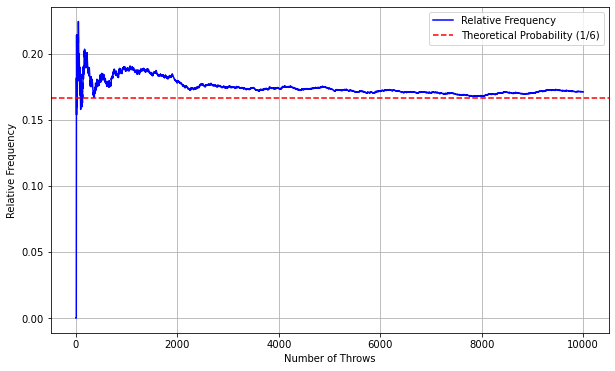

In [34]:
import random
import matplotlib.pyplot as plt

# Number of throws
num_throws = 10000

# Simulate dice throws and calculate relative frequencies
relative_frequencies = []

# Initialize a counter for the number of 3's rolled
count_threes = 0

for i in range(1, num_throws+1):
    # Simulate a dice throw (a random number between 1 and 6) 返回一个 1 到 6 之间的数字
    result = random.randint(1,6)
    
    # Check if the result is 3 and increment the counter
    if result == 3:
        count_threes += 1
        
    # Calculate and append the relative frequency
    relative_frequency = count_threes/i
    # Tracking Data, "relative_frequencies.append(relative_frequency)" is used to store the calculated relative frequency of getting a 3 (rolling a 3 on a six-sided die) after each throw in a list called relative_frequencies. This list is used to keep track of how the relative frequency changes as more and more throws are simulated.
    relative_frequencies.append(relative_frequency)
    
plt.figure(figsize=(10,6))
plt.plot(range(1, num_throws+1), relative_frequencies, label="Relative Frequency", color="blue")
plt.axhline(1/6, color="red", linestyle="--", label="Theoretical Probability (1/6)")
plt.xlabel("Number of Throws")
plt.ylabel("Relative Frequency")
plt.legend()
plt.grid(True)

plt.show()

# Solve exercise 105 in the book. 

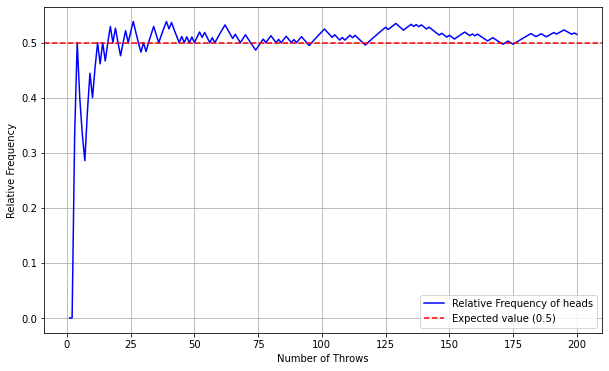

In [3]:
import random
import matplotlib.pyplot as plt

num_throws = 200
relative_frequencies = []
count_head = 0

for i in range(1, num_throws+1):
    result = random.choice(['heads', 'tails'])
    count_head += result == 'heads'
    relative_frequency = count_head / i
    relative_frequencies.append(relative_frequency)
    
plt.figure(figsize=(10,6))
plt.plot(range(1, num_throws+1), relative_frequencies, label="Relative Frequency of heads", color="blue")
plt.axhline(0.5, color="red", linestyle="--", label="Expected value (0.5)")
plt.xlabel("Number of Throws")
plt.ylabel("Relative Frequency")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# Frekvensen är king 0.5 när antalet av kast ökar, vilket innebär att resultatet närmar sig det förväntade värdet, dvs, 0.5.

# Calculate 1!, 2!, ..., 12! . What is your conclusion regarding the growth of the factorial function?

In [38]:
def factorial(n):
    result = 1
    for i in range(1, n+1):
        result *= i
    return result

for n in range(1,13):
    print(f"{n}! = {factorial(n)}")

1! = 1
2! = 2
3! = 6
4! = 24
5! = 120
6! = 720
7! = 5040
8! = 40320
9! = 362880
10! = 3628800
11! = 39916800
12! = 479001600


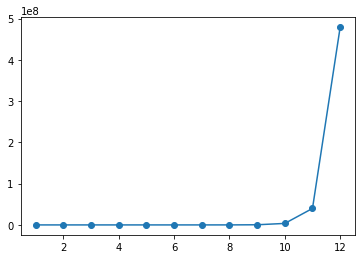

In [54]:
import matplotlib.pyplot as plt

def fractorial(n):
    result = 1
    for i in range(1, n+1):
        result *= i
    return result

n_values = list(range(1,13))

fractorial_values = [fractorial(n) for n in n_values]

plt.plot(n_values, fractorial_values, marker="o", linestyle="-")

plt.show()

# We know that the binomial coefficients can be used to calculate the number of ways to choose k elements from n without replacement when the order does not matter. We have the formula: $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ .

# Now calculate $\binom{6}{2}$ with a built in function and then create your own function (you can use the built in factorial function) and verify that you get the same results. 

In [62]:
import math

n_choose_k_builtin = math.comb(6,2)
print("Using math.comb:", n_choose_k_builtin)



Using math.comb: 15


In [86]:
import math

def binomial_coefficient(n,k):
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))
  
# # Calculate C(6, 2) using the custom function
n_choose_k_custom = binomial_coefficient(6, 2)

print("Using custom function:",n_choose_k_custom)

Using custom function: 15


# Read the following documentation, note the methods such as rvs, pmf, cdf. These are available for most of the distributions meaning "once you know one of them, you know most". 

In [82]:
# Generate random numbers:  r = binom.rvs(n, p, size=1000) 随机变量。rvs(n, p, loc=0, size=1, random_state=None)

# pmf(k, n, p, loc=0) Probability mass function

# cdf(k, n, p, loc=0) Cumulative distribution function.

# sf(k, n, p, loc=0) Survival function (also defined as 1 - cdf, but sf is sometimes more accurate).

Using math.comb: 15
Using custom function: 15


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html 

In general, for discrete distributions, the probability mass function *(also called density function)*, $p(X = x)$, calculates the probability that the random variable takes a specific value. The distribution function *(also called the cumulative distribution function)* $F(x) = P(X \leq x)$ calculates the probability that a random variable is less than or equal to a value. Random number generation simply means that you generate random numbers from a distribution. The quantile function *(also called: Percent point function or inverse CDF)* we will skip for now and will learn more about that in later chapters. 

# Solve exercise 307, 308, 309 in Python. 

In [19]:
#307
from scipy.stats import binom

n = 12
p = 0.4

prob_a = binom.cdf(6, n, p)
prob_b = binom.cdf(5, n, p)
prob_c = binom.pmf(6, n, p)
prob_d = 1 - binom.cdf(6, n, p)

print(f"(a) Pr(X <= 6) = {prob_a}")
print(f"(b) Pr(X < 6) = {prob_b}")
print(f"(c) Pr(X = 6) = {prob_c}")
print(f"(d) Pr(X > 6) = {prob_d}")

(a) Pr(X <= 6) = 0.841787707392
(b) Pr(X < 6) = 0.6652085575680001
(c) Pr(X = 6) = 0.176579149824
(d) Pr(X > 6) = 0.15821229260799996


In [21]:
# 308
from scipy.stats import binom

n = 8
p = 0.25

prob_a = binom.pmf(2, n, p)
prob_b = binom.cdf(1, n, p)
prob_c = 1 - binom.cdf(1, n, p)

print(f"(a) Pr(X = 2) = {prob_a}")
print(f"(b) Pr(X < 2) = {prob_b}")
print(f"(c) Pr(X >= 2) = {prob_c}")


(a) Pr(X = 2) = 0.31146240234375
(b) Pr(X < 2) = 0.3670806884765625
(c) Pr(X >= 2) = 0.6329193115234375


In [17]:
# 309
from scipy.stats import binom

p = 1/3 # sannolikheten att få huvudelöss
n = 3

prob_2 = binom.pmf(2, n, p)
print(f"Sannolikheten att exakt två av tre valda barnen får huvudlöss är {prob_2}")

Sannolikheten att exakt två av tre valda barnen får huvudlöss är 0.22222222222222218


# Solve exercise 314 in Python. 

In [25]:
# 314
from scipy.stats import poisson
mu = 2.0

prob_a = poisson.cdf(4, mu)
prob_b = poisson.cdf(3, mu)
prob_c = poisson.pmf(4, mu)
prob_d = 1 - prob_a

print(f"(a) Pr(X <= 4) = {prob_a}")
print(f"(b) Pr(X < 4) = {prob_b}")
print(f"(c) Pr(X = 4) = {prob_c}")
print(f"(c) Pr(X > 4) = {prob_d}")

(a) Pr(X <= 4) = 0.9473469826562889
(b) Pr(X < 4) = 0.857123460498547
(c) Pr(X = 4) = 0.09022352215774178
(c) Pr(X > 4) = 0.052653017343711084


# Simulate 10000 samples from bin(n= 100, p = 0.35) and plot a histogram. Then simulate 10000 samples from bin(n= 100, p = 0.9) and plot a histogram. In the plots, what is the "middle" of the plot? Which plot has a "wider" distribution?

# What is the theoretical/true Expected Value and Variance of the two distributions? (see p.89 in the book for formulas.)

# Calculate the mean and variance of the two samples that you simulated, use the functions np.mean() and np.var(). Explain your observations . 

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Binomial (n=100, p=0.9)')

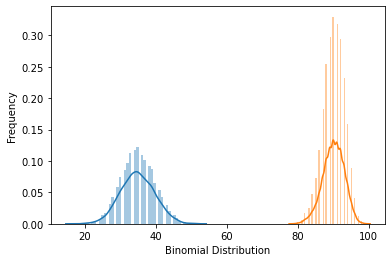

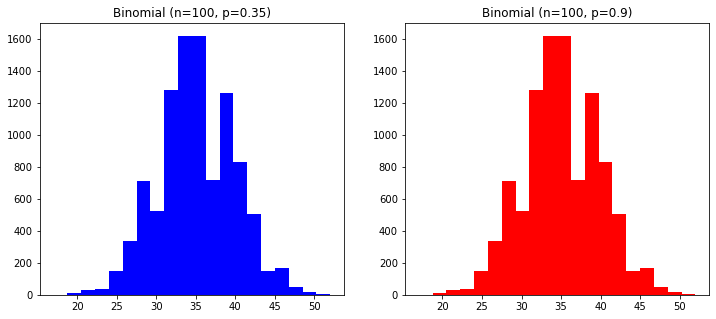

In [58]:
import matplotlib.pyplot as plt
from scipy.stats import binomF
import seaborn as sns

# x = scipy.stats.binom.rvs(100, 0.35, size = 10000)
# y = scipy.stats.binom.rvs(100, 0.9, size = 10000)

samples1 = binom.rvs(n=100, p=0.35, size = 10000)
samples2 = binom.rvs(n=100, p=0.9, size = 10000)
ax = sns.distplot(samples1)
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')
ax = sns.distplot(samples2)
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(samples1, bins=20, color='blue', alpha=1)
plt.title('Binomial (n=100, p=0.35)')

plt.subplot(1,2,2)
plt.hist(samples1, bins=20, color='red', alpha=1)
plt.title('Binomial (n=100, p=0.9)')

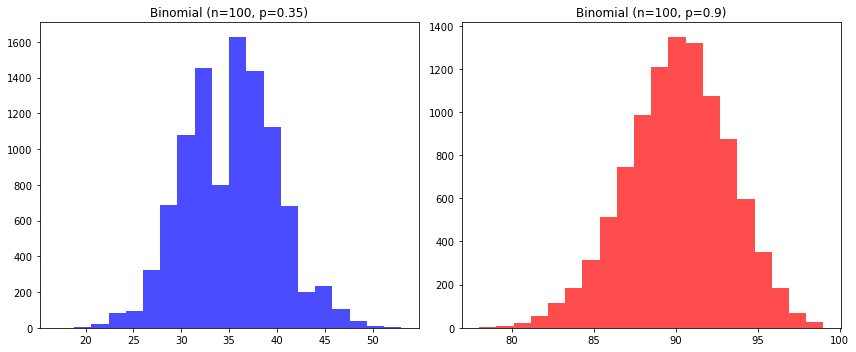

Theoretical Mean-1: 35.0 Theoretical Mean-2: 90.0


In [97]:
import numpy as np
import matplotlib.pyplot as plt

n1, p1 = 100, 0.35
n2, p2 = 100, 0.9

samples1 = np.random.binomial(n1, p1, 10000)
samples2 = np.random.binomial(n2, p2, 10000)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(samples1, bins=20, color="blue", alpha=0.7)
plt.title("Binomial (n=100, p=0.35)")

plt.subplot(1,2,2)
plt.hist(samples2, bins=20, color="red", alpha=0.7)
plt.title("Binomial (n=100, p=0.9)")

plt.tight_layout()
plt.show()

mean1_theoretical = n1 * p1
mean2_theoretical = n2 * p2
print("Theoretical Mean-1:", mean1_theoretical, "Theoretical Mean-2:", mean2_theoretical)


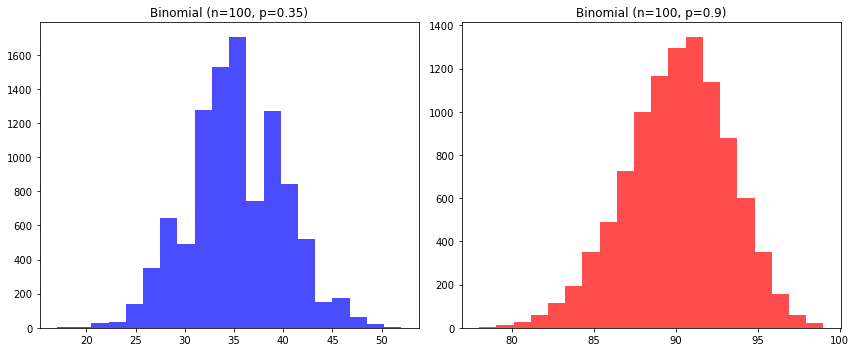

Theoretical Mean and Variance (n=100, p=0.35):
Theoretical Mean: 35.0
Theoretical Variance: 22.75

Sample Mean and Variance (n=100, p=0.35):
Sample Mean: 35.0862
Sample Variance: 23.088569559999996

Theoretical Mean and Variance (n=100, p=0.9):
Theoretical Mean: 90.0
Theoretical Variance: 8.999999999999998

Sample Mean and Variance (n=100, p=0.9):
Sample Mean: 90.0036
Sample Variance: 9.11078704


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Simulate 10,000 samples from binomial distributions
n1, p1 = 100, 0.35
n2, p2 = 100, 0.9

x = stats.binom.rvs(n1, p1, size=10000)
y = stats.binom.rvs(n2, p2, size=10000)

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(x, bins=20, color='blue', alpha=0.7)
plt.title('Binomial (n=100, p=0.35)')

plt.subplot(1, 2, 2)
plt.hist(y, bins=20, color='red', alpha=0.7)
plt.title('Binomial (n=100, p=0.9)')

plt.tight_layout()
plt.show()

# Calculate theoretical expected values (means) and variances
mean1_theoretical = n1 * p1
variance1_theoretical = n1 * p1 * (1 - p1)

mean2_theoretical = n2 * p2
variance2_theoretical = n2 * p2 * (1 - p2)

# Calculate sample means and variances using NumPy
sample_mean1 = np.mean(x)
sample_variance1 = np.var(x)

sample_mean2 = np.mean(y)
sample_variance2 = np.var(y)

# Display results
print("Theoretical Mean and Variance (n=100, p=0.35):")
print("Theoretical Mean:", mean1_theoretical)
print("Theoretical Variance:", variance1_theoretical)

print("\nSample Mean and Variance (n=100, p=0.35):")
print("Sample Mean:", sample_mean1)
print("Sample Variance:", sample_variance1)

print("\nTheoretical Mean and Variance (n=100, p=0.9):")
print("Theoretical Mean:", mean2_theoretical)
print("Theoretical Variance:", variance2_theoretical)

print("\nSample Mean and Variance (n=100, p=0.9):")
print("Sample Mean:", sample_mean2)
print("Sample Variance:", sample_variance2)


In [2]:
import numpy as np
from scipy.stats import binom

prob = binom.cdf(k=5, n=5000, p=0.001)
print(prob)

0.61596066946998


In [10]:
import numpy as np
from scipy.stats import poisson

# X表示n次重复独立试验中事件A(成功)出现的次数

prob1 = poisson.pmf(k=0, mu=1.5)
prob2 = poisson.sf(k=0, mu=2.5)

print('P(x=0)=%.4f'%prob1)
print('P(x>=1)=%.4f'%prob2)


P(x=0)=0.2231
P(x>=1)=0.9179


[8 4 5 ... 5 5 6]


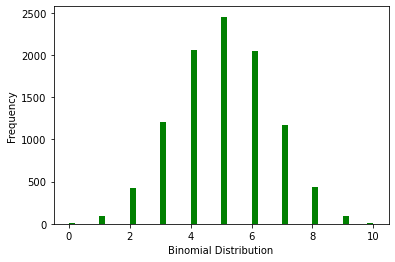

In [20]:
#1. Binomial Distribution
from scipy.stats import binom
import seaborn as sns

data_binom = binom.rvs(n=10, p=0.5, size=10000)

ax = sns.distplot(data_binom, kde=False, color='green', 
                  hist_kws={'linewidth':15, 'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

print(data_binom)

[0 0 0 ... 1 0 1]


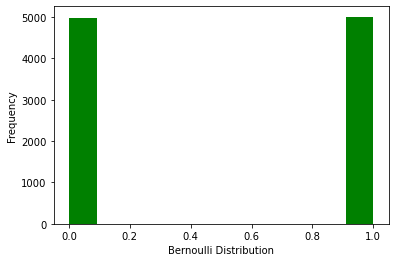

In [24]:
#2. Bernoulli Distribution

from scipy.stats import bernoulli
import seaborn as sns

data_bern = bernoulli.rvs(size=10000, p=0.5)
ax = sns.distplot(data_bern, kde=False, color='green',
                 hist_kws={'linewidth':15, 'alpha':1})
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')
print(data_bern)

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[1 4 3 ... 3 1 1]


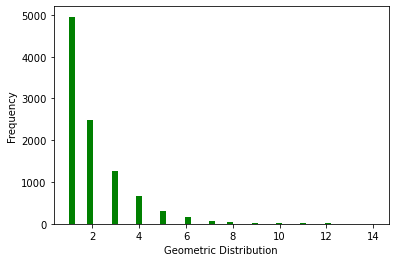

In [28]:
#3. Geometric distribution
from scipy.stats import geom
import seaborn as sns

data_geom = geom.rvs(size=10000, p=0.5)

ax = sns.distplot(data_geom, kde=False, color='green',
                hist_kws={'linewidth':15, 'alpha':1})
ax.set(xlabel='Geometric Distribution', ylabel='Frequency')

print(data_geom)

[2 3 3 ... 2 0 2]


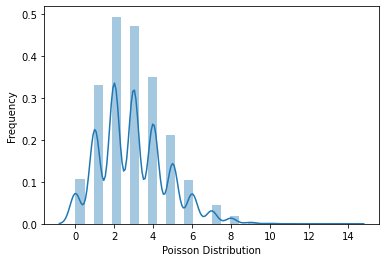

In [30]:
#4. Poisson distribution

from scipy.stats import poisson
import seaborn as sns

data_poisson = poisson.rvs(size=10000, mu=3)

ax=sns.distplot(data_poisson, bins=30)
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

print(data_poisson)

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[ 0.61655007 -1.50278675  0.16199614 ... -0.085252    0.76377718
  0.53389465]


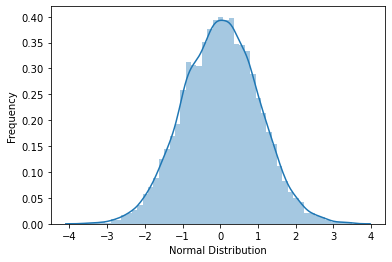

In [32]:
#5. Normal Distribution
from scipy.stats import norm
import seaborn as sns

data_norm = norm.rvs(size=10000)

ax = sns.distplot(data_norm)
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

print(data_norm)